In [0]:
from google.colab import drive
drive. mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/MachineLearning SummerSchool

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

name_file ='./data_lab2_iis.txt'

columns = ['x','y']
data_in = pd.read_csv(name_file, names=columns, sep=' ')

data_in.plot(kind='scatter',x='x',y='y',colors='red')

x = np.asarray(data_in['x'])
y = np.asarray(data_in['y'])

plt.figure(5)
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
len(x) , len(y)
x_train_data = x[:70]
y_train_data = y[:70]

x_test_data = x[70:]
y_test_data = y[70:]


In [0]:
def cfs(x_array , y_array , n):
  one_row = np.ones([len(x_array),1])
  x_transpose = x_array.reshape(-1,1)
  cfs_x = np.hstack([one_row,x_transpose])
  for n in range(2,n+1):
    cfs_x = np.hstack([cfs_x, x_transpose**n])
  
  cfs_x_mul_xtranspose = np.matmul(np.transpose(cfs_x),cfs_x)
  processing_2 = np.linalg.inv(cfs_x_mul_xtranspose)
  processing_3 = np.matmul(processing_2,np.transpose(cfs_x))
  cfs_theta = np.matmul(processing_3,y_array)
  return cfs_theta


In [0]:
x_array= x
one_row = np.ones([100,1])
x_transpose = x_array.reshape(-1,1)
cfs_x = np.hstack([one_row,x_transpose])

for n in range (2,3):
  cfs_x = np.hstack([cfs_x, x_transpose**n])
  
cfs_x  

a~c) unregularized theta

In [0]:
#a) unregularized linear parameter
un_linear_theta = cfs(x_train_data,y_train_data,1)

#b) unregularized parabolic parameter 
un_parabolic_theta = cfs(x_train_data,y_train_data,2)

#c) unregularized 5th-order polynomial
un_5th_theta = cfs(x_train_data,y_train_data,5)


regularized function

In [0]:
def regularized_cfs(x_array , y_array , n):
  rambda = 0.003
  one_row = np.ones([len(x_array),1])
  x_transpose = x_array.reshape(-1,1)
  cfs_x = np.hstack([one_row,x_transpose])
  for n in range(2,n+1):
    cfs_x = np.hstack([cfs_x, x_transpose**n])
  
  cfs_x_mul_xtranspose = np.matmul(np.transpose(cfs_x),cfs_x)
  
  a = np.eye(n+1)
  a[0] = 0
  rambda_matrix = rambda*a
  processing_1 = cfs_x_mul_xtranspose + rambda_matrix
  processing_2 = np.linalg.inv(processing_1)
  processing_3 = np.matmul(processing_2,np.transpose(cfs_x))
  regularized_cfs_theta = np.matmul(processing_3,y_array)
  return regularized_cfs_theta


In [6]:
#d) regularized 5th-order polynomial(RIGDE)

re_5th_theta = regularized_cfs(x_train_data, y_train_data , 5)
re_5th_theta

array([ 2.02365314, -1.4386929 ,  8.49226988,  4.17744452, -7.15996458,
        2.2636937 ])

In [0]:
def plotcurve(x_data , y_data ,order, theta):
  if order == 1:
    plt.plot(x_data, theta[0]*1 + theta[1]*x_data, '-')
    
  elif order == 2:
    plt.plot(x_data, theta[0]*1 + theta[1]*x_data + theta[2]*(x_data**2), '-') 
    
  elif order == 5:
    plt.plot(x_data, theta[0]*1 + theta[1]*x_data + theta[2]*(x_data**2) 
             + theta[3]*(x_data**3) + theta[4]*(x_data**4) + theta[5]*(x_data**5), '-')
  else:
    print('you should make a right input!')

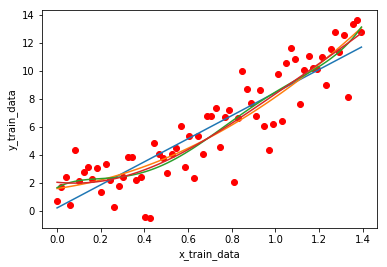

In [8]:
plt.figure(5)
plt.plot(x_train_data,y_train_data,'ro')
plt.xlabel('x_train_data')
plt.ylabel('y_train_data')

plotcurve(x_train_data,y_train_data,1,un_linear_theta)
plotcurve(x_train_data,y_train_data,2,un_parabolic_theta)
plotcurve(x_train_data,y_train_data,5,un_5th_theta)
plotcurve(x_train_data,y_train_data,5,re_5th_theta)

In [0]:
def geterr(input_x, theta, real_y, order):
  if order == 1:
    sum_err = 0
    for i in range(0,len(input_x)):
      exp_y = theta[0]*1 + theta[1]*input_x[i]  
      sub_exp_real = exp_y - real_y[i]
      sum_err += sub_exp_real**2
    real_err = 0.5*sum_err
    return real_err
  
  elif order == 2:
    sum_err = 0
    for i in range(0,len(input_x)):
      exp_y = theta[0]*1 + theta[1]*input_x[i] + theta[2]*(input_x[i]**2) 
      sub_exp_real = exp_y - real_y[i]
      sum_err += sub_exp_real**2
    real_err = 0.5*sum_err
    return real_err
  
  elif order == 5:
    sum_err = 0
    for i in range(0,len(input_x)):
      exp_y = theta[0]*1 + theta[1]*input_x[i] + theta[2]*(input_x[i]**2) + theta[3]*(input_x[i]**3) + theta[4]*(input_x[i]**4) + theta[5]*(input_x[i]**5)
      sub_exp_real = exp_y - real_y[i]
      sum_err += sub_exp_real**2
    real_err = 0.5*sum_err
    return real_err  
  else: 
    print("you should make right input")

In [10]:
a_train_err = geterr(x_train_data,un_linear_theta,y_train_data,1)
b_train_err = geterr(x_train_data,un_parabolic_theta,y_train_data,2)
c_train_err = geterr(x_train_data,un_5th_theta,y_train_data,5)
d_train_err = geterr(x_train_data,re_5th_theta,y_train_data,5)
a_train_err, b_train_err , c_train_err , d_train_err

(105.19721233259915, 90.46523359697387, 87.92094105947945, 88.86411261665434)

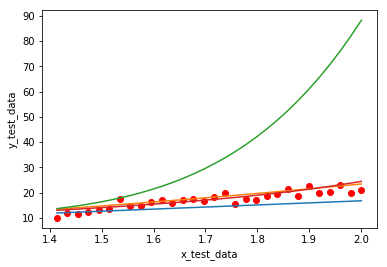

In [11]:
plt.figure(5)
plt.plot(x_test_data,y_test_data,'ro')
plt.xlabel('x_test_data')
plt.ylabel('y_test_data')

plotcurve(x_test_data,y_test_data,1,un_linear_theta)
plotcurve(x_test_data,y_test_data,2,un_parabolic_theta)
plotcurve(x_test_data,y_test_data,5,un_5th_theta)
plotcurve(x_test_data,y_test_data,5,re_5th_theta)

In [12]:
a_test_err = geterr(x_test_data,un_linear_theta,y_test_data,1)
b_test_err = geterr(x_test_data,un_parabolic_theta,y_test_data,2)
c_test_err = geterr(x_test_data,un_5th_theta,y_test_data,5)
d_test_err = geterr(x_test_data,re_5th_theta,y_test_data,5)
a_test_err, b_test_err , c_test_err , d_test_err

(178.69744668520886, 47.282521683823866, 11856.136536113107, 45.20297764612559)